# K-Means algorithm

## What is this algorithm?
- K-means is a unsupervised learning algorithm for clustering that is used to partition N data points (or N observations) into K clusters (or K groups)
- It assigns each data point belongs to the cluster such that the sum of squared distances between the data points and the cluster's centroid is minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

## Why we are using it?
- We use it to find groups which have not been explicitly labeled in the data.
- This can be used to confirm some assumption about what types of groups exist or to identify unknown groups in complex data sets.

## How this algorithm works?
- **Firstly**, we need to tell the algorithm how many number of clusters K you want.
- **Secondly**, we initialize centroids by randomly selecting K data points without replacement.
- **Thirdly**, we keep iterate these processes
  1. Compute the sum of squared distances between each data point with all centroids.
  2. Assign each data point to the nearest centroid that you have just calculated.
  3. Compute the new centroids by taking the average of all the data points belong to each cluster.
  4. Then we repeat the step 1 until there is no change to the centroids.
![](images/howto.PNG)
- **NOTED THAT:** Because K-Means is randomly initialize centroids at the start of the algorithm, different initializations may lead to different clusters. Therefore, I'm recommend to run the algorithm using different initialization of centroids and pick the results of that have the lowest sum of squared distance

<hr>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

- I'm use the data of Dream Housing Finance company for predict loan eligibility
    - Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.

In [2]:
# laod the csv file and see some first row of data
data = pd.read_csv('loan_predict.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


- In here I just use two variables are `LoanAmount` and `ApplicantIncome` to make it easy for visualize step

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
X.head()

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


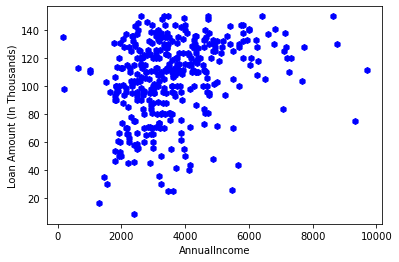

In [4]:
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='blue', marker="h")
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

- In the first step we were about choosing number of cluster (k) 
- And in the second we were about selecting randomly k data points as centroids

[document for pandas.Dataframe.sample()](https://datatofish.com/random-rows-pandas-dataframe/)

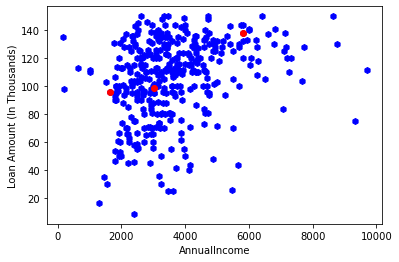

In [5]:
# Firstly, choosing number of clusters
K=3

# Secondly, Select random observation as centroids
np.random.seed(42)
Centroids = (X.sample(n=K)) # randomly select row in dataframea

# plot the figure
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='blue', marker="h")
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [6]:
Centroids

,LoanAmount,ApplicantIncome
266,138.0,5829
192,96.0,1625
46,99.0,3029


In [7]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j = 0

while(True):
    XD=X
    
    i=1 # index for centroids
    
    # We use iterrows for going through each rows in dataframe
    for index1,row_c in Centroids.iterrows(): # Go through each Centroids
        distances = [] 
        for index2,row_d in XD.iterrows():# Calculate distance from all data point to each centroid
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2) # calculate
            distances.append(d)
            
        # Create a column  in dataframe X for storing distances from each point to each centroid
        X[i]=distances
        i=i+1
    
    
    # Assign each data point into the closest centroids
    cluster=[]
    for index,row in X.iterrows(): # Go through each data point
        min_dist=row[1] # assuming closest centroid is centroid 1
        group=1
        
        for i in range(K): # If there is any centroid more closer than centroid 1 we choose it
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                group=i+1
        cluster.append(group)
        
    # Create a column  in dataframe X for storing what group each data point belong
    X["Cluster"]=cluster
    
    # Calculate centroid new = mean all data point in its group
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    
    # calculate difference between the old centroids and new centroids
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print("j = {}   |   diff = {}".format(j,diff.sum()))
        j = j + 1
        if diff == 0: # There is no difference
            break
    
    # Set the old centroids to the new centroids
    Centroids = Centroids_new

<ipython-input-7-8d8aafec6414>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=distances
<ipython-input-7-8d8aafec6414>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=cluster


j = 1   |   diff = 357.6547686061009
j = 2   |   diff = 234.65676147361307
j = 3   |   diff = 241.81286394610947
j = 4   |   diff = 277.68763984371935
j = 5   |   diff = 244.66095351174067
j = 6   |   diff = 229.06905235705375
j = 7   |   diff = 218.24897861156342
j = 8   |   diff = 107.07928213052429
j = 9   |   diff = 52.84741626127729
j = 10   |   diff = 98.54724443834282
j = 11   |   diff = 90.64953219227577
j = 12   |   diff = 18.274686272279013
j = 13   |   diff = 9.21023994083339
j = 14   |   diff = 18.345487493007468
j = 15   |   diff = 46.27013250786139
j = 16   |   diff = 0.0


- Now we visualize the graph the see cluster we got

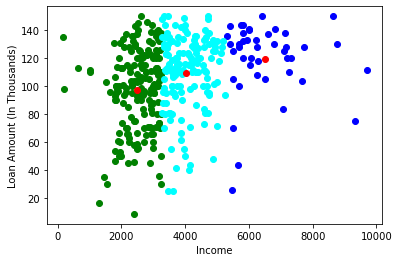

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()